In [1]:

import networkx as nx
from operator import add, sub

import numpy as np
import matplotlib.pyplot as plt
from main_definitions import *
import random
import copy
import python_springrank.tools as tl
from statistics import mean
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from load_datasets import *

In [2]:
dataframe_perf_gains = pd.DataFrame(columns=["Performance gain over PageRank", "Method", "Dataset"])
dataframe_perf_gains

,Performance gain over PageRank,Method,Dataset


In [3]:
results_by_dataset = {}

reverse = False
min_iter = 20
print_rate = 100
cut_off_change = 0.1
max_iter = 1000
print_stuff = False

num_of_runs_on_dataset = 20

In [4]:
datasets = ["Wikipedia Admin Votes", "DBLP Citations" , "Faculty Hiring (History)", "Faculty Hiring (CS)",
                "Faculty Hiring (Business)","Corporate Ownership", "Political Blog Links", "C. Elegans Neural", "Drosophila Medulla"]

In [5]:
for dataset in datasets:

    DG = load_dataset(dataset)

    mapping = dict(zip(DG, range(0, DG.number_of_nodes())))
    relabelled_DG = nx.relabel_nodes(DG, mapping)


    print("Running for dataset ", dataset)

    for i in range(num_of_runs_on_dataset):
        print("     iteration ", i)
        reduced_graph, removed_edges = reduce_graph(relabelled_DG, perc_edge_del=0.2)

        print("basic_pagerank")
        basic_pagerank = generalised_page_rank(reduced_graph, self_loop_weight = 0, alpha = 1,
                                   page_size = 0, end_normalise = False, arrow_dir_powerful = False,
                                   backflow = False, backflow_const = 0,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)




        print("pagerank_backflow")
        pagerank_backflow = generalised_page_rank(reduced_graph, self_loop_weight = 0, alpha = 1,
                                   page_size = 0, end_normalise = False, arrow_dir_powerful = False,
                                   backflow = True, backflow_const = 0.2,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        print("pagerank_selfflow")
        pagerank_selfflow = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                                   page_size = 1, end_normalise = False, arrow_dir_powerful = False,
                                   backflow = False, backflow_const = 0,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        print("pagerank_norm")
        pagerank_norm = generalised_page_rank(reduced_graph, self_loop_weight = 0, alpha = 1,
                                   page_size = 0, end_normalise = True, arrow_dir_powerful = False,
                                   backflow = False, backflow_const = 0,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        print("pagerank_norm_backflow")
        pagerank_norm_backflow = generalised_page_rank(reduced_graph, self_loop_weight = 0, alpha = 1,
                                   page_size = 0, end_normalise = True, arrow_dir_powerful = False,
                                   backflow = True, backflow_const = 0.2,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        print("pagerank_norm_selfflow")
        pagerank_norm_selfflow = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                                   page_size = 1, end_normalise = True, arrow_dir_powerful = False,
                                   backflow = False, backflow_const = 0,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        print("pagerank_selfflow_backflow")
        pagerank_selfflow_backflow = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                                   page_size = 1, end_normalise = False, arrow_dir_powerful = False,
                                   backflow = True, backflow_const = 0.2,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        print("postrank")
        postrank = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                                   page_size = 1, end_normalise = True, arrow_dir_powerful = False,
                                   backflow = True, backflow_const = 0.2,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)





        perf_basic_pagerank = perc_correct(removed_edges, basic_pagerank)

        perf_gain_pagerank_backflow = perc_correct(removed_edges, pagerank_backflow) - perf_basic_pagerank
        perf_gain_pagerank_selfflow = perc_correct(removed_edges, pagerank_selfflow) - perf_basic_pagerank
        perf_gain_pagerank_pagerank_norm = perc_correct(removed_edges, pagerank_norm) - perf_basic_pagerank
        perf_gain_pagerank_norm_backflow = perc_correct(removed_edges, pagerank_norm_backflow) - perf_basic_pagerank
        perf_gain_pagerank_norm_selfflow = perc_correct(removed_edges, pagerank_norm_selfflow) - perf_basic_pagerank
        perf_gain_pagerank_selfflow_backflow = perc_correct(removed_edges, pagerank_selfflow_backflow) - perf_basic_pagerank

        perf_gain_postrank = perc_correct(removed_edges, postrank) - perf_basic_pagerank

        row = {"Performance gain over PageRank": perf_gain_pagerank_backflow, "Method": "PageRank + backflow", "Dataset": dataset}
        dataframe_perf_gains = dataframe_perf_gains.append(row, ignore_index=True)

        row = {"Performance gain over PageRank": perf_gain_pagerank_selfflow, "Method": "PageRank + selflow", "Dataset": dataset}
        dataframe_perf_gains = dataframe_perf_gains.append(row, ignore_index=True)

        row = {"Performance gain over PageRank": perf_gain_pagerank_pagerank_norm, "Method": "PageRank + norm", "Dataset": dataset}
        dataframe_perf_gains = dataframe_perf_gains.append(row, ignore_index=True)

        row = {"Performance gain over PageRank": perf_gain_pagerank_norm_backflow, "Method": "PageRank + norm + backflow", "Dataset": dataset}
        dataframe_perf_gains = dataframe_perf_gains.append(row, ignore_index=True)

        row = {"Performance gain over PageRank": perf_gain_pagerank_norm_selfflow, "Method": "PageRank + norm + self-flow", "Dataset": dataset}
        dataframe_perf_gains = dataframe_perf_gains.append(row, ignore_index=True)

        row = {"Performance gain over PageRank": perf_gain_pagerank_selfflow_backflow, "Method": "PageRank + self-flow + backflow", "Dataset": dataset}
        dataframe_perf_gains = dataframe_perf_gains.append(row, ignore_index=True)

        row = {"Performance gain over PageRank": perf_gain_postrank, "Method": "PostRank", "Dataset": dataset}
        dataframe_perf_gains = dataframe_perf_gains.append(row, ignore_index=True)

Running for dataset  Wikipedia Admin Votes
     iteration  0
basic_pagerank
pagerank_backflow
pagerank_selfflow
pagerank_norm
pagerank_norm_backflow
pagerank_norm_selfflow
pagerank_selfflow_backflow
postrank
     iteration  1
basic_pagerank
pagerank_backflow
pagerank_selfflow
pagerank_norm
pagerank_norm_backflow
pagerank_norm_selfflow
pagerank_selfflow_backflow
postrank
     iteration  2
basic_pagerank
pagerank_backflow
pagerank_selfflow
pagerank_norm
pagerank_norm_backflow
pagerank_norm_selfflow
pagerank_selfflow_backflow
postrank
     iteration  3
basic_pagerank
pagerank_backflow
pagerank_selfflow
pagerank_norm
pagerank_norm_backflow
pagerank_norm_selfflow
pagerank_selfflow_backflow
postrank
     iteration  4
basic_pagerank
pagerank_backflow
pagerank_selfflow
pagerank_norm
pagerank_norm_backflow
pagerank_norm_selfflow
pagerank_selfflow_backflow
postrank
     iteration  5
basic_pagerank
pagerank_backflow
pagerank_selfflow
pagerank_norm
pagerank_norm_backflow
pagerank_norm_selfflow
pag

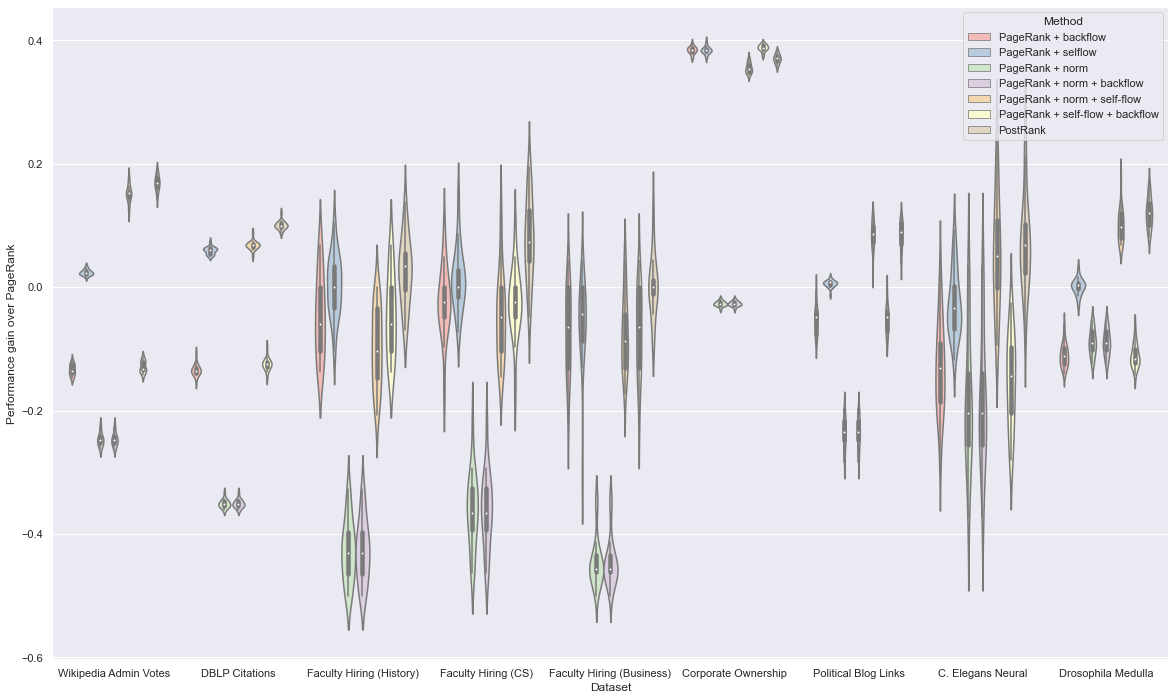

In [6]:
sns.set(rc={'figure.figsize':(20,12)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over PageRank", hue="Method", data=dataframe_perf_gains, palette="Pastel1")
plt.show()

<ipython-input-10-42a7ee1e982b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_yticklabels([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6], size = 15)


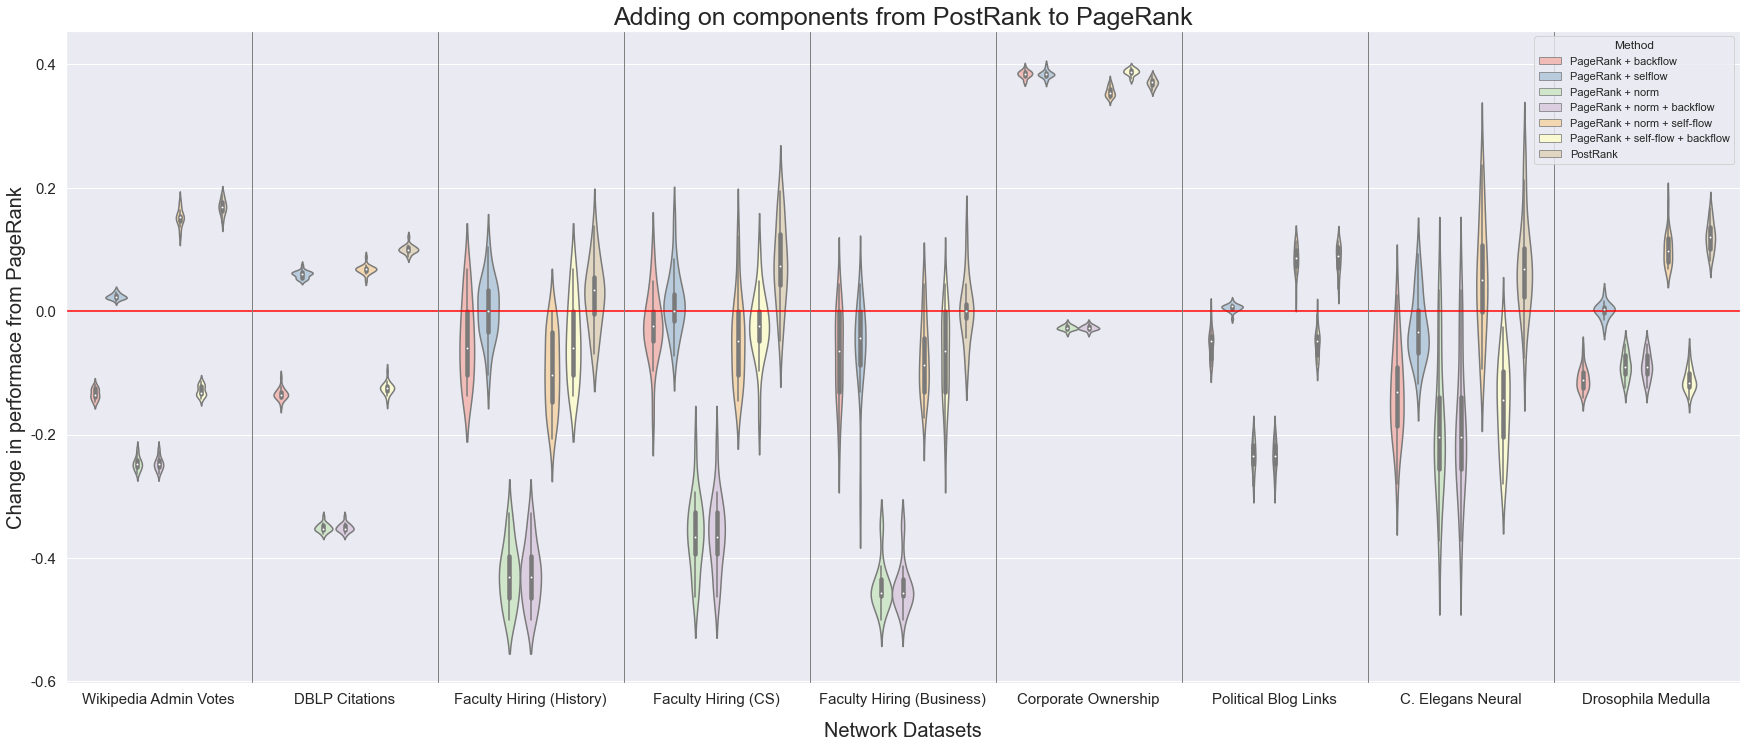

In [10]:
sns.set(rc={'figure.figsize':(30,12)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over PageRank", hue="Method", data=dataframe_perf_gains, palette="Pastel1")

sns_plot.axes.set_title("Adding on components from PostRank to PageRank",fontsize=25)
sns_plot.set_xlabel("Network Datasets",fontsize=20)
sns_plot.set_ylabel("Change in performace from PageRank",fontsize=20)
y_ticks = sns_plot.get_yticks()
sns_plot.set_yticklabels([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6], size = 15)
sns_plot.set_xticklabels(datasets, size = 15)
sns_plot.xaxis.labelpad = 15
sns_plot.axhline(y=0, color='red')
for i in range(len(np.unique(dataframe_perf_gains['Dataset'])) - 1):
    sns_plot.axvline(i + 0.5, color='grey', lw=1)

sns_plot.figure.savefig("PageRank_vs_PostRank.png")
plt.show()

In [8]:
sns_plot.get_yticks()

array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6])